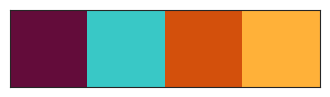

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib
import plotly
import plotly.express as px

plt.rcParams["figure.figsize"] = (14,5)
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139'];
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [2]:
import chart_studio
import chart_studio.plotly as py

chart_studio.tools.set_credentials_file(username='afroviking', api_key='OoSOvfWISRx0ySVh0giR')

## Further preprocessing

After loading the `.csv` file which was created in the *feature_generation.ipynb* we need to pre-process the data further if we want to train machine learning models or plot the data.

One thing that immediately stands out when looking at the values is the big difference between the single values. 
To counteract this, all values were normalized column by column.

After that we need to encode the `target` column into numbers. Right now the genre is stores as a `string`. As all the machine learning models can not handle strings, numbers from 0-3 need to be encoded. Each number for one genre.


### Features and Target Split

In [3]:
# df = pd.read_csv('./data/features_results.csv', index_col=0)
df = pd.read_csv('./data/features_results.csv', index_col=0)

df.head()

,rmseP_a,rmseP_std,rmseH_a,rmseH_std,centroid_a,centroid_std,bw_a,bw_std,contrast_a,contrast_std,...,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std,genre
Alex Gaudino & Shena - Watch Out,0.052344,0.037047,0.130824,0.062915,3975.834104,1240.080633,4021.559373,984.921994,18.015254,9.118588,...,1.669509,1.783066,129.199219,1.445506,2.415820,-0.027943,-0.313349,85.062266,49.121739,electro house
"Aero Manyelo, Thee Suka, Nkuli Keys - Indlela (radio edit)",0.032243,0.043069,0.080565,0.069813,2746.232644,1604.492512,3249.551395,1164.539858,21.307561,14.845564,...,1.767042,2.688751,123.046875,2.738690,8.300369,1.342229,1.335341,98.372180,56.791401,afro house
Afrika System - Anikana-O (Massimo Berardi Extended Remix),0.055083,0.074039,0.115479,0.092910,3275.041060,1623.932075,3687.176598,978.028798,20.026468,14.590174,...,2.417403,3.953294,117.453835,2.452279,6.017077,0.815863,-0.812915,202.278333,116.922174,afro house
"Afro Wav, K",0.041162,0.051825,0.166069,0.131383,2285.857434,1331.340593,3364.804015,962.576365,19.921390,13.906426,...,2.020663,2.960649,120.185320,2.106637,3.912216,0.684071,-0.870440,203.878182,117.526818,afro house
Anarcrusan - In My Mind Armonica Rework Yoshitoshi Recordings-www,0.029259,0.039056,0.159502,0.121776,2442.008219,1777.217605,3569.004247,1277.744099,20.452388,13.650505,...,2.082514,3.631826,123.046875,2.268574,5.838849,0.529329,-1.013115,203.629114,117.688244,deep melodic house


In [4]:
X = df.drop('genre', axis=1)
y = df['genre']



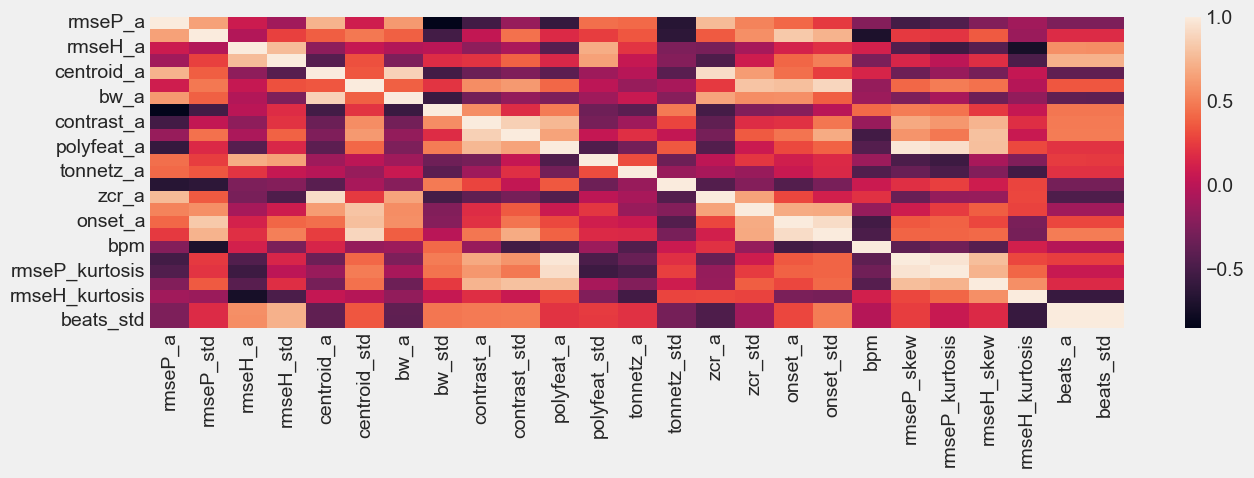

In [5]:
plt.style.use('fivethirtyeight')
sns.heatmap(X.corr())
plt.tight_layout()
plt.savefig('./plots/correlation.png')
plt.show()

In [6]:
fig = px.imshow(X.corr())
fig.write_html("./plots/heatmap.html")
py.plot(fig, filename = 'Correlations', auto_open=False)

'https://plotly.com/~afroviking/1/'

In [7]:
df.describe()

,rmseP_a,rmseP_std,rmseH_a,rmseH_std,centroid_a,centroid_std,bw_a,bw_std,contrast_a,contrast_std,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.043817,0.050370,0.135042,0.096686,3213.113428,1656.593462,3725.759304,1079.045309,20.343727,13.842208,...,0.055671,2.095983,3.361716,123.474663,2.152727,5.065055,0.676847,-0.446961,179.087636,103.372873
std,0.012158,0.013625,0.027180,0.025667,723.511070,286.407763,504.425393,151.776282,1.031734,1.820355,...,0.014780,0.381744,0.893200,3.767065,0.454348,2.220395,0.371245,0.711418,64.367115,37.161380
min,0.029259,0.037047,0.080565,0.062915,2285.857434,1240.080633,2907.374334,938.709691,18.015254,9.118588,...,0.039454,1.669509,1.783066,117.453835,1.445506,2.380438,-0.027943,-1.013115,85.062266,49.121739
25%,0.032243,0.039056,0.122206,0.069813,2568.180338,1528.995989,3364.804015,962.576365,20.026468,13.906426,...,0.046902,1.788566,2.960649,123.046875,1.812486,3.873964,0.529329,-0.812915,141.008244,81.417321
50%,0.041162,0.043587,0.131161,0.092910,3275.041060,1623.932075,3687.176598,984.921994,20.452388,14.555666,...,0.051459,2.020663,3.166481,123.046875,2.224921,4.578736,0.727248,-0.716911,189.388883,109.428259
75%,0.052344,0.058230,0.158061,0.120869,3975.834104,1777.217605,4080.677001,1164.539858,21.127258,14.590174,...,0.059088,2.417403,3.953294,123.046875,2.452279,6.017077,0.815863,-0.313349,203.629114,117.526818
max,0.064398,0.074039,0.166069,0.131383,4069.047977,2078.334376,4482.394230,1337.736402,21.438029,14.972040,...,0.088524,2.696918,4.588191,129.199219,2.738690,8.300369,1.342229,1.335341,298.989846,172.636548


### Scale

In [8]:
scaler = MinMaxScaler()

In [9]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=df.columns[:-1])
X_scaled.index = df.index

In [10]:
X_scaled

,rmseP_a,rmseP_std,rmseH_a,rmseH_std,centroid_a,centroid_std,bw_a,bw_std,contrast_a,contrast_std,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std
Alex Gaudino & Shena - Watch Out,0.656952,0.000000,0.587796,0.000000,0.947726,0.000000,0.707410,0.115813,0.000000,0.000000,...,0.151780,0.000000,0.000000,1.000000,0.000000,0.005977,0.000000,0.297969,0.000000,0.000000
"Aero Manyelo, Thee Suka, Nkuli Keys - Indlela (radio edit)",0.084923,0.162788,0.000000,0.100737,0.258175,0.434727,0.217253,0.565953,0.961883,0.978393,...,0.400121,0.094931,0.322868,0.476190,1.000000,1.000000,1.000000,1.000000,0.062217,0.062095
Afrika System - Anikana-O (Massimo Berardi Extended Remix),0.734905,1.000000,0.408325,0.438084,0.554727,0.457918,0.495106,0.098538,0.587597,0.934762,...,0.292042,0.727942,0.773665,0.000000,0.778523,0.614304,0.615840,0.085248,0.547924,0.548926
"Afro Wav, K",0.338723,0.399497,1.000000,1.000000,0.000000,0.108869,0.290428,0.059812,0.556898,0.817951,...,0.000000,0.341786,0.419797,0.232558,0.511243,0.258749,0.519653,0.060753,0.555403,0.553821
Anarcrusan - In My Mind Armonica Rework Yoshitoshi Recordings-www,0.000000,0.054309,0.923201,0.859693,0.087568,0.640781,0.420077,0.849653,0.712035,0.774230,...,0.244656,0.401987,0.659065,0.476190,0.636466,0.584198,0.406717,0.000000,0.554238,0.555128
Krister Linder Sasha - Cut Me Down feat,0.038817,0.036840,0.829750,0.685473,0.158325,0.504327,0.000000,1.000000,1.000000,0.928867,...,0.086768,0.115881,0.493174,1.000000,0.602710,0.371338,0.551165,0.123399,1.000000,1.000000
Rahpael Mader - Vacuity,0.325212,0.572640,0.487007,0.423040,0.986806,0.980648,1.000000,0.448307,0.909205,0.929097,...,0.563387,1.000000,0.953115,0.476190,0.971577,0.994536,0.579037,0.157670,0.487673,0.488253
rick retro - rule the world,0.549046,0.176788,0.591742,0.085663,0.686657,0.344663,0.744945,0.027178,0.746313,0.899522,...,0.235658,0.159462,0.443276,0.476190,0.137653,0.000000,0.309886,0.126127,0.261518,0.261471
Clay Smith - Metronome (Original Mix) [Clinique Recordings],1.000000,0.838466,0.906348,0.846444,1.000000,1.000000,0.801208,0.000000,0.648663,1.000000,...,1.000000,0.893879,1.000000,0.476190,0.283780,0.252288,0.647131,0.318512,0.486704,0.483356


In [11]:
y

Alex Gaudino & Shena - Watch Out                                          electro house
Aero Manyelo, Thee Suka, Nkuli Keys - Indlela (radio edit)                   afro house
Afrika System - Anikana-O (Massimo Berardi Extended Remix)                   afro house
Afro Wav, K                                                                  afro house
Anarcrusan - In My Mind Armonica Rework Yoshitoshi Recordings-www    deep melodic house
Krister Linder Sasha - Cut Me Down feat                              deep melodic house
Rahpael Mader - Vacuity                                                   electro house
rick retro - rule the world                                               melodic house
Clay Smith - Metronome (Original Mix) [Clinique Recordings]               melodic house
Name: genre, dtype: object

Need to impute numbers out of the different genres.



In [12]:
# instantiate labelencoder object
le = LabelEncoder()

In [13]:
y = le.fit_transform(y)

In [14]:
list(le.classes_)

['afro house', 'deep melodic house', 'electro house', 'melodic house']

In [15]:
encoded_classes = {}
for i, idx in zip(range(0, 4), list(le.classes_)):
    encoded_classes[idx] = i    

In [16]:
encoded_classes

{'afro house': 0,
 'deep melodic house': 1,
 'electro house': 2,
 'melodic house': 3}

The label encoder generated the following mapping:

* **0:** classic
* **1:** hardstyle
* **2:** house
* **3:** punk


### Dimensionality Reduction

With the scaled and encoded data, we can now easily reduce the dimensionality. Dimensionality reduction has two main benefits. First we are able to visualize a multi dimensional dataset and secondly our machine learning algorithms are speed up.
The original data has 27 columns, anyways I projected the original data into 3 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.
As the DataFrame only contains 311 rows the 27 features would probably have a overfitted model. Furthermore the third benefit is that each Machine Learning method only has to deal with 3 features and one target variable. This speeds up the calculation.

#### Feature Importance with PCA (Alone)

Now we will use all of the data and do a PCA directly. Before we first eliminated some features by doing a lasso regression. As more data is available now, we expect the PCA to be even more detailed. 

In the first step we will set a high number of prinicpal components to gather as much information about the variance distrubition as possible.

In [17]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])

In [18]:
fig = px.bar(x=principalDf.columns, y= pca.explained_variance_ratio_)
fig.write_html("./plots/pca.html")

We can see (and calculate) that the first 6 PC's are responsible for 83% of the variance. Anyways it makes no sense to use more than 6 PC's. Even 4 would be a good choice (75% explained variance).

As we've seen aboce, the clusters might not be separated perfectly, therefore the worst thing we could do is overfit.

In [19]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

In [20]:
principalDf['target'] = df['genre'].values
principalDf.index = df.index
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,target
Alex Gaudino & Shena - Watch Out,1.713723,-1.109011,0.402511,-0.329151,0.054989,-0.308613,electro house
"Aero Manyelo, Thee Suka, Nkuli Keys - Indlela (radio edit)",-0.943521,-0.517388,1.392495,0.340740,0.450737,0.170159,afro house
Afrika System - Anikana-O (Massimo Berardi Extended Remix),0.065761,0.846476,-0.118824,0.775352,-0.200979,-0.355351,afro house
"Afro Wav, K",-0.173119,-0.295203,-0.943212,0.517560,0.312426,-0.249764,afro house
Anarcrusan - In My Mind Armonica Rework Yoshitoshi Recordings-www,-0.864365,-0.412244,-0.466836,-0.223903,-0.298158,0.356061,deep melodic house
Krister Linder Sasha - Cut Me Down feat,-0.887497,-0.616704,-0.695048,-0.589186,0.095477,-0.181762,deep melodic house
Rahpael Mader - Vacuity,-0.434203,1.035828,0.730087,-0.499319,-0.433945,-0.322496,electro house
rick retro - rule the world,0.740332,-0.361620,-0.023609,0.358375,-0.510296,0.521086,melodic house
Clay Smith - Metronome (Original Mix) [Clinique Recordings],0.782890,1.429866,-0.277564,-0.350467,0.529748,0.370681,melodic house


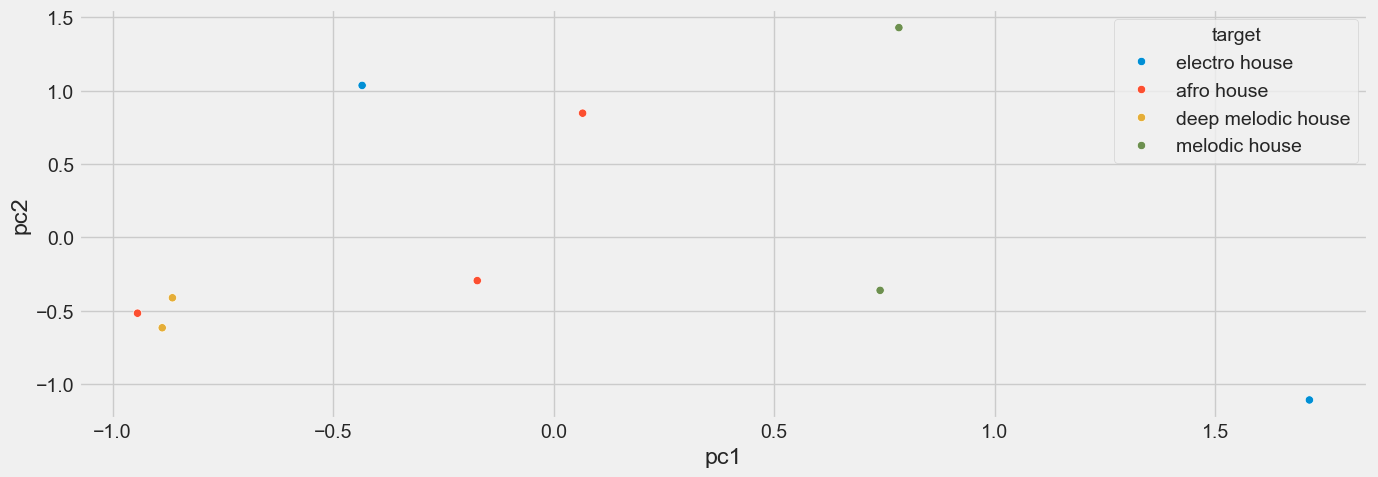

In [21]:
sns.scatterplot(data=principalDf, x='pc1', y='pc2', hue='target')
plt.tight_layout()
plt.savefig('./plots/scatter_2d.png')

In [22]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
principalDf['target'] = df['genre'].values
principalDf.index = df.index

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    principalComponents,
    labels=labels,
    dimensions=range(4),
    color=principalDf['target']
)
fig.update_traces(diagonal_visible=False)
fig.write_html("./plots/pca_4_components.html")

In [23]:
py.plot(fig, filename = 'PCA 4 Components', auto_open=False)

'https://plotly.com/~afroviking/2/'

The plot above shows that even  the first to PC's give us a very good separation of the different genres. Better than before! It seems that *house*  and *hardstyle* music are very similar - this makes total sense! Both contain a dominat bass beat and are many songs are similar in general. Of course *hardsytle* contains the "harder" beats but anyways - it seems the graph does a great job! Also the fact that classic is futher apart from the other three genres is totally plausible.

**Let's check the first three PC's:**

In [24]:
fig = px.scatter_3d(principalDf, x='pc1', y='pc2', z='pc3', color='target')
fig.write_html("./plots/pca_scatter3d.html")

In a three dimensional space the separation is even better!

## Machine Learning

In [25]:
le = LabelEncoder()

In [26]:
principalDf['target_encoded'] = le.fit_transform(principalDf['target'])

In [27]:
principalDf

,pc1,pc2,pc3,pc4,target,target_encoded
Alex Gaudino & Shena - Watch Out,1.713723,-1.109011,0.402511,-0.329151,electro house,2
"Aero Manyelo, Thee Suka, Nkuli Keys - Indlela (radio edit)",-0.943521,-0.517388,1.392495,0.340740,afro house,0
Afrika System - Anikana-O (Massimo Berardi Extended Remix),0.065761,0.846476,-0.118824,0.775352,afro house,0
"Afro Wav, K",-0.173119,-0.295203,-0.943212,0.517560,afro house,0
Anarcrusan - In My Mind Armonica Rework Yoshitoshi Recordings-www,-0.864365,-0.412244,-0.466836,-0.223903,deep melodic house,1
Krister Linder Sasha - Cut Me Down feat,-0.887497,-0.616704,-0.695048,-0.589186,deep melodic house,1
Rahpael Mader - Vacuity,-0.434203,1.035828,0.730087,-0.499319,electro house,2
rick retro - rule the world,0.740332,-0.361620,-0.023609,0.358375,melodic house,3
Clay Smith - Metronome (Original Mix) [Clinique Recordings],0.782890,1.429866,-0.277564,-0.350467,melodic house,3


In [28]:
principalDf.groupby('target')['target_encoded'].value_counts()

target              target_encoded
afro house          0                 3
deep melodic house  1                 2
electro house       2                 2
melodic house       3                 2
Name: count, dtype: int64

Seems like everything worked fine! Each encoded number only contains the coresponding `target` value.

**Train Test Split:**

We need to make sure that the trainingsset and the testingset are balanced when it comes to the different genres. We can ensure that with the function `strtify`.

In [29]:
X = principalDf.drop(['target', 'target_encoded'], axis=1)

In [30]:
y = principalDf['target_encoded']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y ,random_state=7)

ValueError: The test_size = 2 should be greater or equal to the number of classes = 4

In [ ]:
y_train.value_counts() / len(y_train)

In [ ]:
y_test.value_counts() / len(y_test)

In [ ]:
y_train.unique()

Perfect! Every genre has the same amount of values in the Train and Test set!

### SVM

In [ ]:
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, y_train)

In [ ]:
svm_preds = clf_svm.predict(X_test, )

In [ ]:
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(svm_preds)))

In [ ]:
#from sklearn.metrics import confusion_matrix # plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay;

class_names = [0,1,2,3]

cnf_matrix = confusion_matrix(y_test, svm_preds)
disp = ConfusionMatrixDisplay.from_estimator(clf_svm, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

# disp = plot_confusion_matrix(clf_svm, X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues)

plt.savefig('./plots/confusion_matrix.png')
plt.show()